# **COURSE**          : Introduction to Machine Learning 

# **COURSE-CODE**      : CSE-3008 

# **SLOT**             : L41 + L42

# **TEAM MEMBERS**

**S.Jayanth - 19BCD7098**

**N.V. Seetharam - 19BCD7185**

**U.P.L. Abhinav - 19BCN7191**

**Ch. B V S N Pavan Kumar - 19BCE7653** 

## **Project Title :** ***Credit Card Applications***

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report. I just recently got a credit card, and the analysis of this dataset will give me a general idea of the most important features that makes one qualify for credit card

For this project, we will use [Credit Card approval dataset](http://archive.ics.uci.edu/ml/datasets/credit+approval) from the UCI machine learning repository, and compare different machine learning algorithms in predicting approval status. The metric for comparison that will be used is accuracy score. 

In [62]:
#necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [63]:
#connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
#load dataset
CC_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crx.csv', names = ["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", "Employed", \
                                         "CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income", "ApprovalStatus"])


In [65]:
#inspect data
CC_data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [66]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [67]:
CC_data.shape

(690, 16)

## 1. Data Understanding

In [68]:
# Replace "?" with NaN
CC_data.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
CC_data["Age"] = pd.to_numeric(CC_data["Age"])
# CC_data2 = CC_data[:,:]
CC_data2 = CC_data.copy()

In [69]:
CC_data.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [70]:
CC_data.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

## 2. Data Preparation

In [71]:
# Imputing missing values for numerical columns with mean value
CC_data.fillna(CC_data.mean(), inplace=True)

In [72]:
CC_data.tail(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,00240,3,-
684,b,40.58,3.290,u,g,m,v,3.500,f,f,0,t,s,00400,0,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.290,f,f,0,t,g,00000,0,-


In [73]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


## 3. Data description and distribution

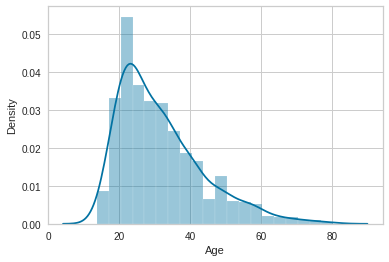

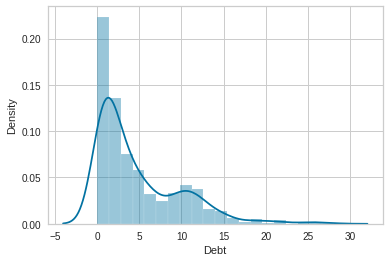

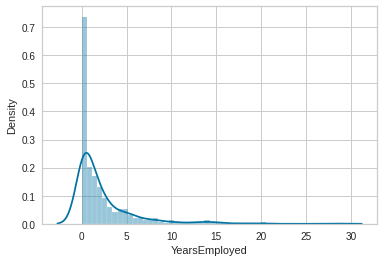

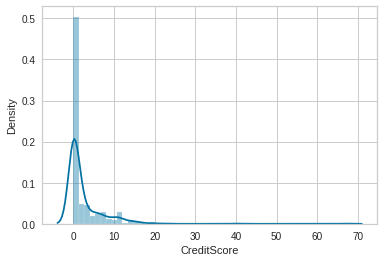

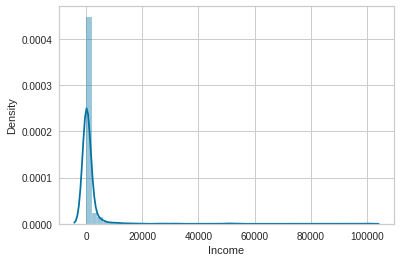

In [74]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(CC_data['Age'])
plotDistPlot(CC_data['Debt'])
plotDistPlot(CC_data['YearsEmployed'])
plotDistPlot(CC_data['CreditScore'])
plotDistPlot(CC_data['Income'])

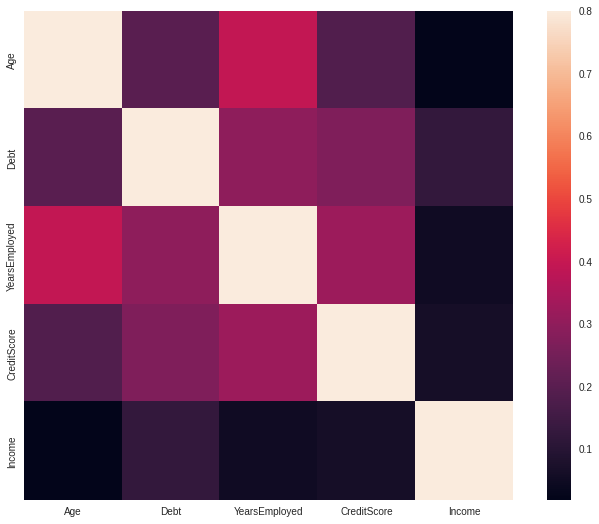

In [75]:
#correlation matrix
corrmat = CC_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

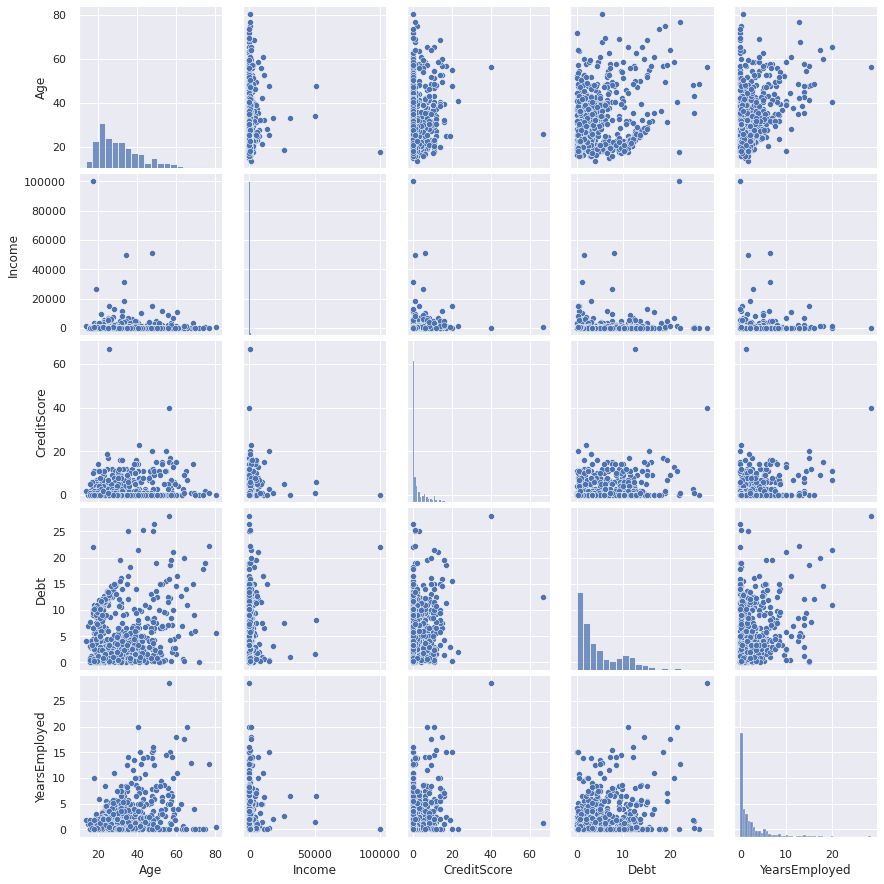

In [76]:
#scatterplot
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(CC_data[cols], size = 2.5)
plt.show();

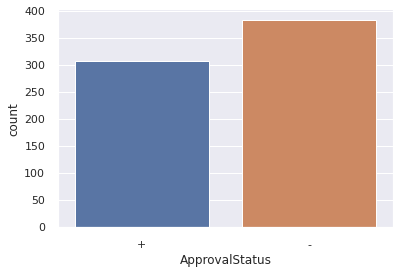

In [77]:
sns.countplot(data = CC_data, x = 'ApprovalStatus')

#### From the figure above, just over 380 people got denied a credit card and 307 got approved of a credit card

#### How is the age distribution of credit card applicants in this data?

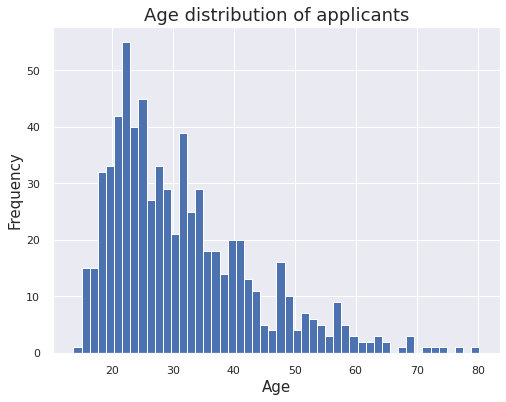

In [78]:
plt.figure(figsize = (8, 6))
CC_data['Age'].plot(kind = 'hist', bins = 50)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age distribution of applicants', size = 18)
plt.show()

In [79]:
print(CC_data['Age'].max())
print(CC_data['Age'].min())

80.25
13.75


#### How does Credit score and Income affect credit card approval?

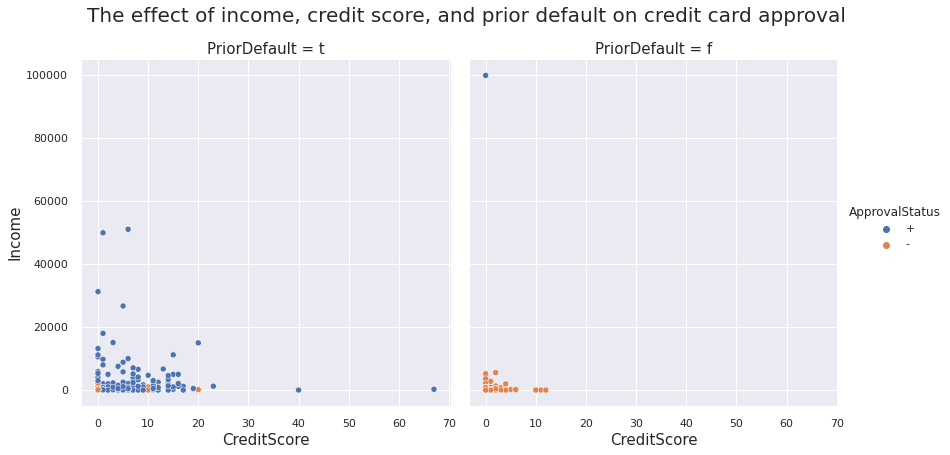

In [80]:
plt.rcParams["axes.labelsize"] = 15
a = sns.relplot(x='CreditScore', y = 'Income', hue = 'ApprovalStatus',  data = CC_data, height = 6, aspect = 1, col = 'PriorDefault')
a.set_axis_labels('CreditScore', 'Income')
a.fig.suptitle('The effect of income, credit score, and prior default on credit card approval', position = [.5, 1.05], size = 20)
plt.savefig('prior_default_figure.png', bbox_inches = 'tight')
plt.show()

From the figure above, we deduce that applicants with high income and/or high credit score are likely to be approved to a credit card. **However, the most important feature that separates the dependendent variable - ApprovalStatus is PriorDefault. The figure shows that most people with PriorDefault are denied a credit card.** 

### Data Preprocessing

In [81]:
CC_data.isnull().sum()

Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [82]:
print("shape of the data:", CC_data.shape)

shape of the data: (690, 16)


In [83]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(CC_data)

In [84]:
CC_data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in CC_data:
    if CC_data[col].dtypes=='object':
        CC_data[col]=le.fit_transform(CC_data[col])

In [86]:
CC_data.head(15)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,68,0,0
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,0,11,560,0
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,0,96,824,0
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,1,0,31,3,0
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,0,2,37,0,0
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,1,0,115,0,0
6,1,33.17,1.040,1,0,11,3,6.500,1,0,0,1,0,54,31285,0
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,0,23,1349,0
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,0,62,314,0
9,1,42.50,4.915,2,2,12,7,3.165,1,0,0,1,0,15,1442,0


In [87]:
CC_data.tail(15)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
675,0,41.58,1.040,1,0,0,7,0.665,0,0,0,0,0,84,237,1
676,0,30.58,10.665,1,0,10,3,0.085,0,1,12,1,0,40,3,1
677,1,19.42,7.250,1,0,9,7,0.040,0,1,1,0,0,31,1,1
678,0,17.92,10.210,1,0,5,2,0.000,0,0,0,0,0,0,50,1
679,0,20.08,1.250,1,0,1,7,0.000,0,0,0,0,0,0,0,1
680,1,19.50,0.290,1,0,8,7,0.290,0,0,0,0,0,96,364,1
681,1,27.83,1.000,2,2,3,3,3.000,0,0,0,0,0,60,537,1
682,1,17.08,3.290,1,0,6,7,0.335,0,0,0,1,0,44,2,1
683,1,36.42,0.750,2,2,3,7,0.585,0,0,0,0,0,84,3,1
684,1,40.58,3.290,1,0,9,7,3.500,0,0,0,1,2,129,0,1


## 4. Data Modeling and Evaluation

In [88]:
from sklearn.model_selection import train_test_split
# Removing the feature which are not important and converting to NumPy array
CC_data = CC_data.drop(['DriversLicense', 'ZipCode'], axis=1)
CC_data = CC_data.values

# **Spliting the data into training and testing sets**

In [89]:
# Creating new variable to input features and labels
X,y = CC_data[:,0:13] , CC_data[:,13]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=123)

In [90]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [91]:
rescaledX = scaler.transform(X)

In [92]:
accuracies = dict()

# **Random Forest Classifier**

Random Forest Classification Accuracy is: 0.8985507246376812


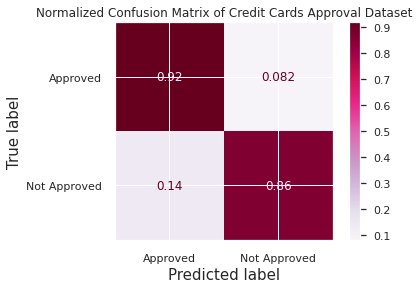

In [93]:
#****************RANDOM FOREST CLASSIFIER*************************
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators= 500, random_state= 0)
classifier.fit(rescaledX_train, y_train)

#Make Prediction
y_pred = classifier.predict(rescaledX_test)

from sklearn.metrics import accuracy_score

accuracies['Random FOREST Classification'] = accuracy_score(Y_test, y_pred)
print('Random Forest Classification Accuracy is: ' + str(accuracy_score(Y_test, y_pred)))

#CONFUSION MATRIX
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, Y_test, display_labels= ['Approved', 'Not Approved'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Credit Cards Approval Dataset")
plt.show()

In [94]:
#Accuracy,Precission,Recall,F-1 Score
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89        98
         1.0       0.87      0.95      0.91       109

    accuracy                           0.90       207
   macro avg       0.90      0.90      0.90       207
weighted avg       0.90      0.90      0.90       207



According to the Random Forest Classifier, PriorDefault is the most important feature, followed by Credit Score and Employment status.

Feature ranking:
1. feature 8 (0.288031)
2. feature 2 (0.106878)
3. feature 12 (0.106456)
4. feature 7 (0.105091)
5. feature 10 (0.099212)
6. feature 1 (0.089727)
7. feature 5 (0.065237)
8. feature 9 (0.056431)
9. feature 6 (0.030880)
10. feature 0 (0.016061)
11. feature 3 (0.012645)
12. feature 11 (0.011887)
13. feature 4 (0.011464)


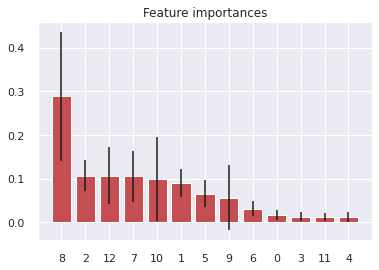

In [95]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Which attribute has played most important role in credit card request decision?

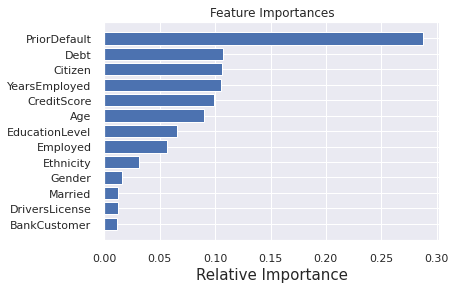

In [96]:
# copy of CC_data is in CC_data2
CC_data2 = CC_data2.drop(['ApprovalStatus'], axis=1)

features = CC_data2.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **Logistic Regression**

Logistic Regression Accuracy is: 0.893719806763285


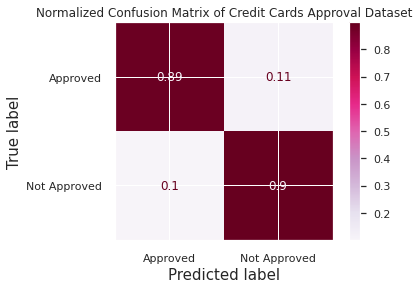

In [97]:
#****************LOGISTIC REGRESSON*************************
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

#Make Prediction
y_pred = lr.predict(rescaledX_test)

from sklearn.metrics import accuracy_score

accuracies['Logistic Regression'] = accuracy_score(Y_test, y_pred)
print('Logistic Regression Accuracy is: ' + str(accuracy_score(Y_test, y_pred)))

#confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, rescaledX_test, Y_test,display_labels=['Approved', 'Not Approved'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Credit Cards Approval Dataset")
plt.show()

In [98]:
#Accuracy,Precission,Recall,F-1 Score
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        98
         1.0       0.90      0.90      0.90       109

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207



In [99]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary
param_grid = dict(tol=tol, max_iter=max_iter)

In [100]:
# Initializing GridSearchCV
grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Rescaling the entire data set with all the predictive features
rescaledX = scaler.fit_transform(X)

# Calculating and summarizing the final results
grid_model_result = grid_model.fit(rescaledX, y)
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_ 
print("Best: %f using %s" %  (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}


# **SVM**

Kernel SVM Accuracy is: 0.8985507246376812


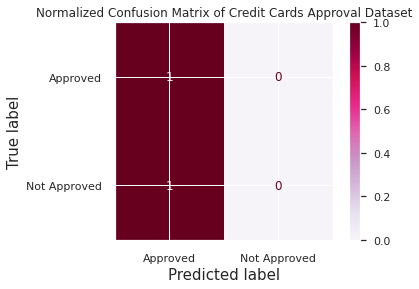

In [101]:
#****************KERNEL SVM*************************
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(rescaledX_train, y_train)

#Make Prediction
y_pred = classifier.predict(rescaledX_test)

from sklearn.metrics import accuracy_score

accuracies['Kernel SVM'] = accuracy_score(Y_test, y_pred)
print('Kernel SVM Accuracy is: ' + str(accuracy_score(Y_test, y_pred)))
#CONFUSION MATRIX
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, Y_test, display_labels= ['Approved', 'Not Approved'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Credit Cards Approval Dataset")
plt.show()

In [102]:
#Accuracy,Precission,Recall,F-1 Score
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89        98
         1.0       0.90      0.91      0.90       109

    accuracy                           0.90       207
   macro avg       0.90      0.90      0.90       207
weighted avg       0.90      0.90      0.90       207



# **Artificial Neural Network (ANN) Classifier**

In [103]:
#****************Artificial Neural Network (ANN) *************************

#importing required libraries -- Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers import BatchNormalization 
from keras.utils import np_utils
from yellowbrick.model_selection import learning_curve
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [104]:
#Initialising ANN
ANNclassifier = Sequential()

In [105]:
#Adding Input layer and 1st Hidden Layer
ANNclassifier.add(Dense(units=7,activation="relu"))

In [106]:
#Adding 2nd hidden layer
ANNclassifier.add(Dense(units=7,activation="relu"))

In [107]:
#Adding Output Layer
ANNclassifier.add(Dense(units=1,activation="sigmoid"))

In [108]:
#Compiling ANN
ANNclassifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [126]:
#Fitting ANN
result=ANNclassifier.fit(rescaledX_train, y_train, validation_data=(rescaledX_test,Y_test),batch_size = 10, epochs = 40, verbose = 1)

Epoch 1/40
49/49 [==============================] - 0s 4ms/step - loss: 0.2677 - accuracy: 0.8944 - val_loss: 0.3528 - val_accuracy: 0.8986
Epoch 2/40
49/49 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 0.8965 - val_loss: 0.3442 - val_accuracy: 0.9034
Epoch 3/40
49/49 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.8820 - val_loss: 0.3522 - val_accuracy: 0.8986
Epoch 4/40
49/49 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.8923 - val_loss: 0.3480 - val_accuracy: 0.9034
Epoch 5/40
49/49 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.8986 - val_loss: 0.3422 - val_accuracy: 0.8986
Epoch 6/40
49/49 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.8923 - val_loss: 0.3524 - val_accuracy: 0.8986
Epoch 7/40
49/49 [==============================] - 0s 4ms/step - loss: 0.2657 - accuracy: 0.8965 - val_loss: 0.3386 - val_accuracy: 0.8986
Epoch 8/40
49/49 [==

In [127]:
_, train_acc = ANNclassifier.evaluate(rescaledX_train, y_train, verbose=1)
_, test_acc = ANNclassifier.evaluate(rescaledX_test, Y_test, verbose=1)
print("Artificial Neural Network (ANN) classifier has accuracy of: ")
print('Train Accuracy : %.3f, Test Accuracy : %.3f' % (train_acc, test_acc))
accuracies['ANN'] = test_acc

7/7 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.9034
Artificial Neural Network (ANN) classifier has accuracy of: 
Train Accuracy : 0.903, Test Accuracy : 0.903


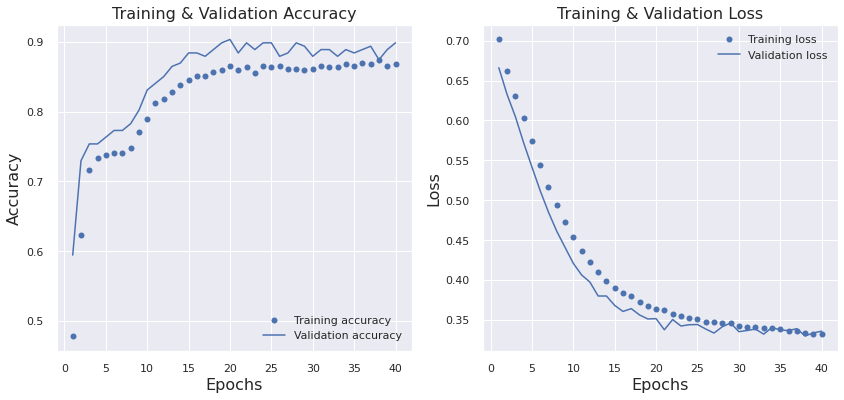

In [111]:
# Import ML Libaries 
import keras #library for neural network
from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
 
history_dict = result.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

## **Comparing machine learning algorithms**

#### In this section, We will be comparing the performance of different machine learning algorithms on how well each one fits to the training data and prediction with test data. The scoring metric for comparison here is 'accuracy'

In [112]:
# import algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from keras.models import Sequential 

In [113]:
# prepare models
models = []
models.append(('Logistic Regression : ', LogisticRegression()))
models.append(('Random Forest : ', RandomForestClassifier(n_estimators = 500)))
models.append(('Linear SVM : ', SVC(kernel = 'linear', C = 0.025)))
models.append(('RBF SVM : ', SVC()))

# prepare configuration for cross validation test harness

# evaluate each model in turn 
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = None)
    cv_results = model_selection.cross_val_score(estimator = model, X = rescaledX_test, y=Y_test, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    message = "{}: mean = {}; std = {}".format(name, cv_results.mean(), cv_results.std())
    print(message)  

Logistic Regression : : mean = 0.8752380952380951; std = 0.07058389453551321
Random Forest : : mean = 0.8607142857142858; std = 0.08594050834767437
Linear SVM : : mean = 0.8800000000000001; std = 0.07425518298103159
RBF SVM : : mean = 0.8702380952380953; std = 0.07628899879975146


In [128]:
model_df = pd.DataFrame()
model_df['Model Name'] = names
model_df['Accuracy Score'] = np.mean(results, axis = 1)
model_df

,Model Name,Accuracy Score
0,Logistic Regression :,0.875238
1,Random Forest :,0.860714
2,Linear SVM :,0.880000
3,RBF SVM :,0.870238


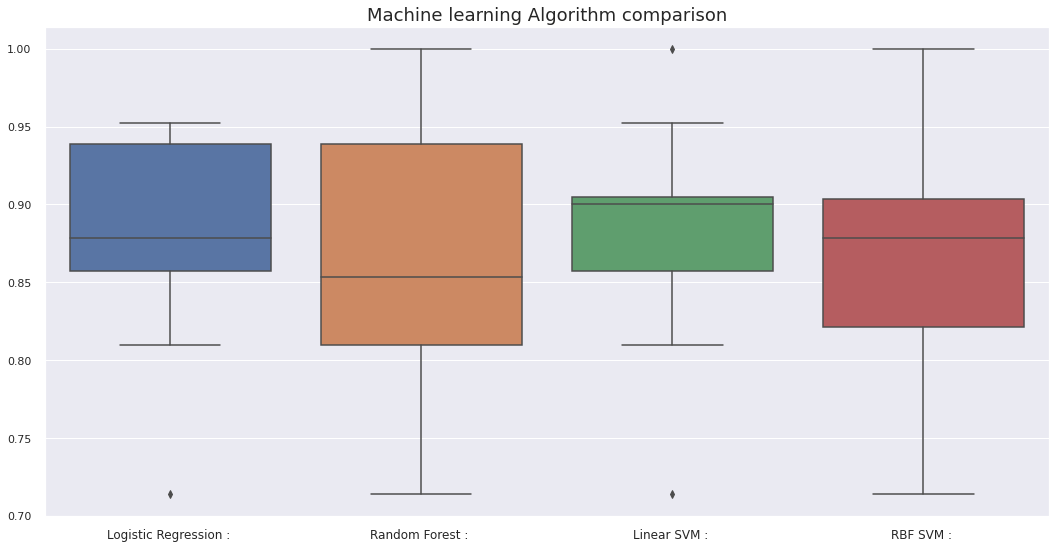

In [115]:
plt.figure(figsize = (18, 9))
ax = sns.boxplot(data=results)
ax.set_xticklabels(names, size = 12)
plt.title('Machine learning Algorithm comparison', size = 18)
plt.savefig('machine_learning_comparison.png')
plt.show()

#### From the figure above, we achieved the highest mean accuracy (86.97%) with Linear SVM algorithm. 

In [116]:
### Get most important feature responsible for determining which applicants get credit card or not. 
models

[('Logistic Regression : ', LogisticRegression()),
 ('Random Forest : ', RandomForestClassifier(n_estimators=500)),
 ('Linear SVM : ', SVC(C=0.025, kernel='linear')),
 ('RBF SVM : ', SVC())]

In [129]:
#RESULTS
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy Score']) 
accuracy_df

,Model Name,Accuracy Score
0,Random FOREST Classification,0.898551
1,Logistic Regression,0.893720
2,Kernel SVM,0.898551
3,ANN,0.903382


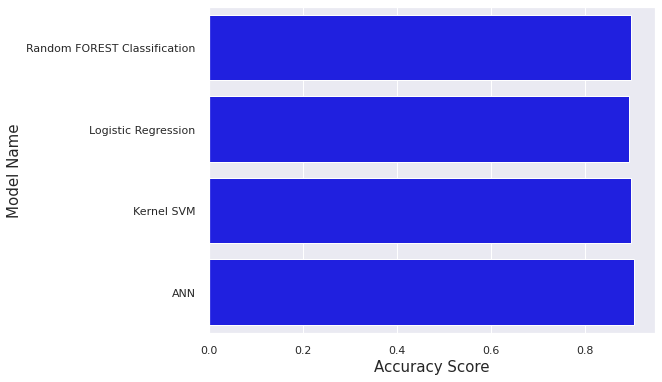

In [130]:
# ploting accuracies
f, ax = plt.subplots(figsize=(8, 6))
sns.set_color_codes("pastel")
sns.barplot(y="Model Name", x="Accuracy Score", data = accuracy_df, color="blue")
plt.show()